In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [ ]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from fbprophet import Prophet

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train_E1GspfA.csv')

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/test_6QvDdzb.csv')

In [ ]:
train_df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [ ]:
def preprocess(df):
  index = pd.DatetimeIndex(df.date)
  df.set_index(index, inplace = True)
  df.drop(columns='date', inplace=True)
  df = df.reset_index()
  for i in range(df.shape[0]): 
    df['date'][i] = df['date'][i]+datetime.timedelta(hours  = int(df['hour'][i]))
  #df = df.set_index('date')
  return df

In [ ]:
train_df1 = preprocess(train_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
train_df1.head()

,date,hour,demand
0,2018-08-18 09:00:00,9,91
1,2018-08-18 10:00:00,10,21
2,2018-08-18 13:00:00,13,23
3,2018-08-18 14:00:00,14,104
4,2018-08-18 15:00:00,15,81


In [ ]:
df = train_df1.copy()

In [ ]:
df.head()

,date,hour,demand
0,2018-08-18 09:00:00,9,91
1,2018-08-18 10:00:00,10,21
2,2018-08-18 13:00:00,13,23
3,2018-08-18 14:00:00,14,104
4,2018-08-18 15:00:00,15,81


In [ ]:
train_df.head()

,hour,demand
date,,
2018-08-18,9,91
2018-08-18,10,21
2018-08-18,13,23
2018-08-18,14,104
2018-08-18,15,81


In [ ]:
#df.Timestamp = pd.to_datetime(df.date,format='%d-%m-%Y %H:%M:%S') 
df.index = df['date']
df = df.resample('D').mean()


KeyError: ignored

In [ ]:
df

,hour,demand
date,,
2018-08-18,16.692308,48.615385
2018-08-19,13.933333,69.333333
2018-08-20,13.714286,59.642857
2018-08-21,14.066667,62.133333
2018-08-22,13.937500,59.000000
...,...,...
2021-02-24,12.666667,79.000000
2021-02-25,12.714286,67.476190
2021-02-26,11.500000,75.500000


In [ ]:
train_df.Timestamp = pd.to_datetime(train_df.reset_index().date,format='%d-%m-%Y %H:%M') 
train_df.index = train_df.Timestamp 
train_df = train_df.resample('D').mean() 
test_df.Timestamp = pd.to_datetime(test_df.date,format='%d-%m-%Y %H:%M') 
test_df.index = test_df.Timestamp 
test_df = test_df.resample('D').mean()
#Plotting data
train_df.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
train_df.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

In [ ]:
train_df.drop(columns='date', inplace=True)

In [ ]:
train_df.head()

,hour,demand
date,,
2018-08-18,9,91
2018-08-18,10,21
2018-08-18,13,23
2018-08-18,14,104
2018-08-18,15,81


In [ ]:
def preprocess(df):
  index = pd.DatetimeIndex(df.date)
  df.set_index(index, inplace = True)
  df.drop(columns='date', inplace=True)
  df = df.reset_index()
  for i in range(df.shape[0]): 
    df['date'][i] = df['date'][i]+datetime.timedelta(hours  = int(df['hour'][i]))
  df = df.set_index('date')
  return df

In [ ]:
train_df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [ ]:
test_df.head()

,date,hour
0,2021-03-01 00:00:00,0
1,2021-03-01 01:00:00,1
2,2021-03-01 02:00:00,2
3,2021-03-01 03:00:00,3
4,2021-03-01 05:00:00,5


In [ ]:
train_df = preprocess(train_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
train_df.head()

,hour,demand
date,,
2018-08-18 09:00:00,9,91
2018-08-18 10:00:00,10,21
2018-08-18 13:00:00,13,23
2018-08-18 14:00:00,14,104
2018-08-18 15:00:00,15,81


In [ ]:
test_df = preprocess(test_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
test_df.head()

,hour
date,
2021-03-01 00:00:00,0
2021-03-01 01:00:00,1
2021-03-01 02:00:00,2
2021-03-01 03:00:00,3
2021-03-01 05:00:00,5


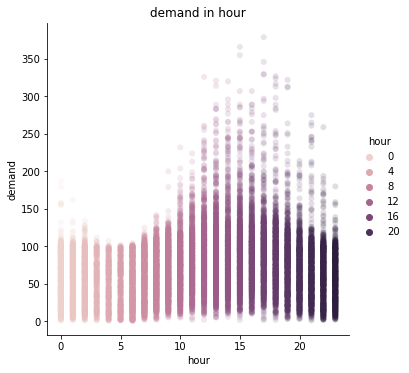

In [ ]:
sns.pairplot(train_df.dropna(),
             hue='hour',
             x_vars=['hour'],
             y_vars='demand',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            ).set(title='demand in hour')

In [ ]:
train_df[['demand']]

,demand
date,
2018-08-18 09:00:00,91
2018-08-18 10:00:00,21
2018-08-18 13:00:00,23
2018-08-18 14:00:00,104
2018-08-18 15:00:00,81
...,...
2021-02-28 19:00:00,95
2021-02-28 20:00:00,88
2021-02-28 21:00:00,39


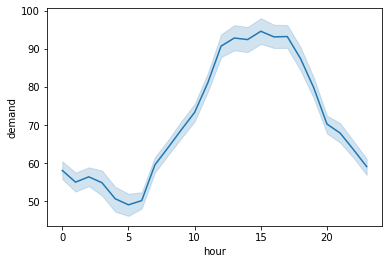

In [ ]:
sns.lineplot(x = train_df['hour'], y =  train_df['demand'])

In [ ]:
series = train_df[['demand']].values

In [ ]:
series

array([[ 91],
       [ 21],
       [ 23],
       ...,
       [ 39],
       [104],
       [ 85]])

In [ ]:
type(series)

numpy.ndarray

In [ ]:
train_df.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


In [ ]:
import statistics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# here i am just trying to make a function to all our outlier analysis
def checkOutliers(data, plot=True):
  Q1 = np.percentile(data, 25,
                   interpolation = 'midpoint')
 
  Q3 = np.percentile(data, 75,
                    interpolation = 'midpoint')
  IQR = Q3 - Q1

  upperLimit = Q3 +1.5*IQR
  lowerLimit = Q1 - 1.5*IQR
  # Upper Bound
  upperValues = np.where(data >= upperLimit)[0].tolist()
  # Lower bound
  lowerValues = np.where(data <=  lowerLimit)[0].tolist()
  # i am not printing the values 
  #print(f'Upper Values -\n {upperValues}\nLower values -\n{lowerValues}')
  print(f'there is {np.count_nonzero(upperValues)} upper bound values and {np.count_nonzero(lowerValues)} lower bound values ')
  return upperValues, lowerValues

In [ ]:
# this whole function will replace the outliers with the median value
def removeOutlier(data, plot = True):
  maxValue, minValue = 0,0
  upperIndex, lowerIndex = checkOutliers(data)
  median_ = np.median(data)
  newData = []
  if len(upperIndex) != 0:
    maxValue = min([data[i] for i in upperIndex])
    for i in data:
      if i < maxValue:
        newData.append(i)
      else:
          newData.append(median_)

  if len(lowerIndex) != 0:
    minValue = max([data[i] for i in lowerIndex])
    for i in data:
      if i > minValue:
        newData.append(i)
      else:
        newData.append(median_)
  if plot:
    fig, axes = plt.subplots(1, 2)
    sns.boxplot(data,ax=axes[0]).set(title='with outliers')
    sns.boxplot(newData, ax=axes[1]).set(title='without outliers')
    plt.show()
  print(f"we had {len(data)} rows and after removing outlier we have {len(newData)}, {abs(len(newData)- len(data))} rows have been removed")
  return newData

there is 352 upper bound values and 0 lower bound values 


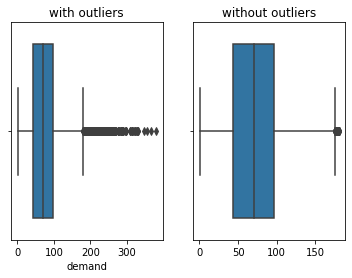

we had 18247 rows and after removing outlier we have 18247, 0 rows have been removed


In [ ]:
train_df['demand'] = removeOutlier(train_df['demand'])

In [ ]:
train_df.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,71.030580
std,6.544963,35.530843
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,96.000000
max,23.000000,180.000000


there is 35 upper bound values and 0 lower bound values 


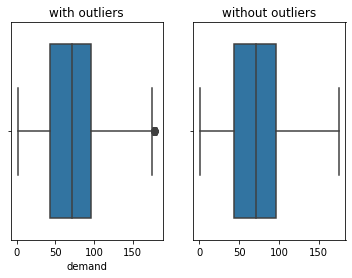

we had 18247 rows and after removing outlier we have 18247, 0 rows have been removed


In [ ]:
train_df['demand'] = removeOutlier(train_df['demand'])

In [ ]:
train_df.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,70.825780
std,6.544963,35.221284
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,96.000000
max,23.000000,175.000000


In [ ]:
train_df.head()

,hour,demand
date,,
2018-08-18 09:00:00,9,91.0
2018-08-18 10:00:00,10,21.0
2018-08-18 13:00:00,13,23.0
2018-08-18 14:00:00,14,104.0
2018-08-18 15:00:00,15,81.0


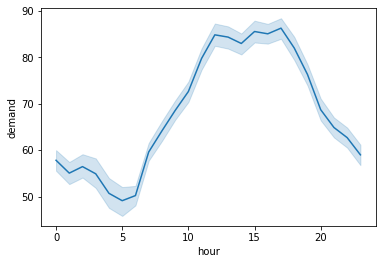

In [ ]:
sns.lineplot(x = train_df['hour'], y =  train_df['demand'])

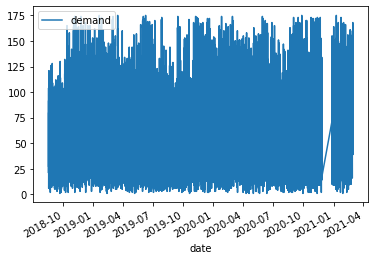

In [ ]:
train_df[['demand']].plot(kind = 'line')

In [ ]:
train_df_mean = train_df[['demand']].rolling(window=30).mean()

In [ ]:
train_df_mean

,demand
date,
2018-08-18 09:00:00,NaN
2018-08-18 10:00:00,NaN
2018-08-18 13:00:00,NaN
2018-08-18 14:00:00,NaN
2018-08-18 15:00:00,NaN
...,...
2021-02-28 19:00:00,96.266667
2021-02-28 20:00:00,95.033333
2021-02-28 21:00:00,92.700000


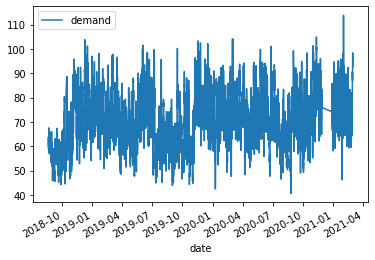

In [ ]:
train_df_mean.plot()

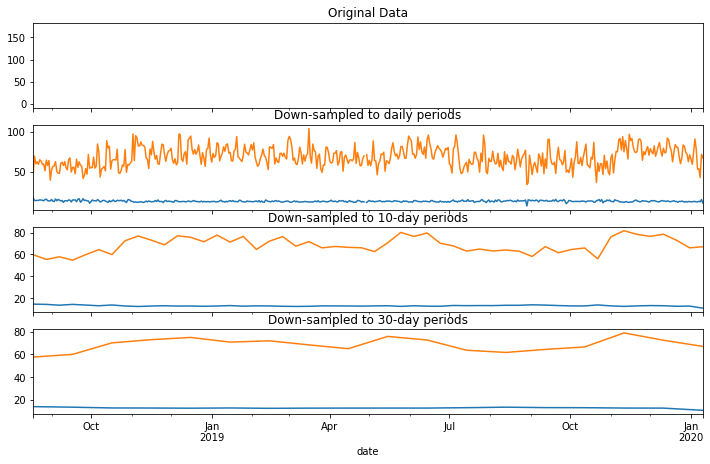

In [ ]:
fig, ax = plt.subplots(4, sharex=True)
train_df[:10000].plot(figsize=(12,8), ax=ax[0], title="Original Data",
legend=False)
train_df[:10000].resample('D').mean().plot(figsize=(12,8), ax=ax[1], 
title="Down-sampled to daily periods",legend=False)
train_df[:10000].resample('10D').mean().plot(figsize=(12,8), ax=ax[2], 
title="Down-sampled to 10-day periods",legend=False)
train_df[:10000].resample('30D').mean().plot(figsize=(12,8), ax=ax[3],
title="Down-sampled to 30-day periods",legend=False)

In [ ]:
value = pd.DataFrame(series)

In [ ]:
value

,0
0,91
1,21
2,23
3,104
4,81
...,...
18242,95
18243,88
18244,39
18245,104


In [ ]:
train_df_1 = pd.concat([value,value.shift(1)],axis=1)

In [ ]:
train_df_1.head()

,0,0
0,91,NaN
1,21,91.0
2,23,21.0
3,104,23.0
4,81,104.0


In [ ]:
train_df_1.columns = ['actual_demand','forcast_demand']

In [ ]:
train_df_1

,actual_demand,forcast_demand
0,91,NaN
1,21,91.0
2,23,21.0
3,104,23.0
4,81,104.0
...,...,...
18242,95,122.0
18243,88,95.0
18244,39,88.0
18245,104,39.0


baseline

In [ ]:
# figuring the error
from sklearn.metrics import mean_squared_error


In [ ]:
train_df_1 = train_df_1[1:]

In [ ]:
train_df_1.head()

,actual_demand,forcast_demand
1,21,91.0
2,23,21.0
3,104,23.0
4,81,104.0
5,37,81.0


In [ ]:
train_df_1.tail()

,actual_demand,forcast_demand
18242,95,122.0
18243,88,95.0
18244,39,88.0
18245,104,39.0
18246,85,104.0


In [ ]:
train_error = mean_squared_error(train_df_1.actual_demand, train_df_1.forcast_demand)

In [ ]:
np.sqrt(train_error)

43.272892696866116

# +- 43 people so the error should go down this error.bold text

ARIMA - auto regressive (q) intregrated (d) moving average (q)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf ,plot_acf

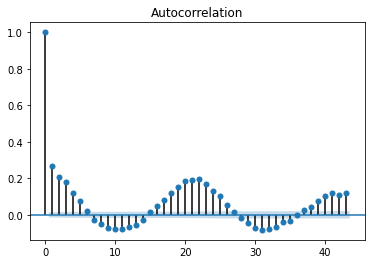

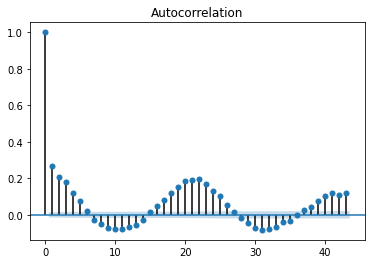

In [ ]:
# plot_acf is to identy parameter ! 
# ARIMA(p,d,q)
plot_acf(train_df[['demand']])

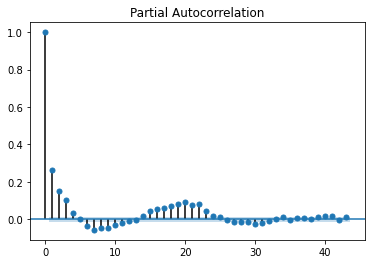

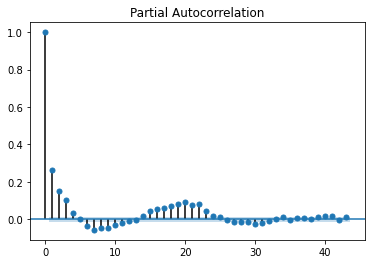

In [ ]:
plot_pacf(train_df[['demand']]) # to identify value of p

In [ ]:
# q = 6, 7, p = 4, 5, d = 0

In [ ]:
train_df.shape, test_df.shape

((18247, 2), (7650, 1))

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model1 = ARIMA(train_df['demand'], order=(6,0,4))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
model_fit = model1.fit()

In [ ]:
model_fit.aic #smaller is better

178860.58078345656

In [ ]:
forcast = model_fit.forecast(steps=7650)[0]

In [ ]:
forcast

array([70.58550919, 69.41903825, 71.48743627, ..., 70.69012035,
       70.93062725, 70.69015472])

In [ ]:
train_df

,hour,demand
date,,
2018-08-18 09:00:00,9,91.0
2018-08-18 10:00:00,10,21.0
2018-08-18 13:00:00,13,23.0
2018-08-18 14:00:00,14,104.0
2018-08-18 15:00:00,15,81.0
...,...,...
2021-02-28 19:00:00,19,95.0
2021-02-28 20:00:00,20,88.0
2021-02-28 21:00:00,21,39.0


In [ ]:
train_df_1

,actual_demand,forcast_demand
1,21,91.0
2,23,21.0
3,104,23.0
4,81,104.0
5,37,81.0
...,...,...
18242,95,122.0
18243,88,95.0
18244,39,88.0
18245,104,39.0


In [ ]:
len(forcast)

7650

In [ ]:
test_df['forcast'] = forcast

In [ ]:
test_df.head()

,hour,forcast
date,,
2021-03-01 00:00:00,0,70.585509
2021-03-01 01:00:00,1,69.419038
2021-03-01 02:00:00,2,71.487436
2021-03-01 03:00:00,3,73.230108
2021-03-01 05:00:00,5,77.293184


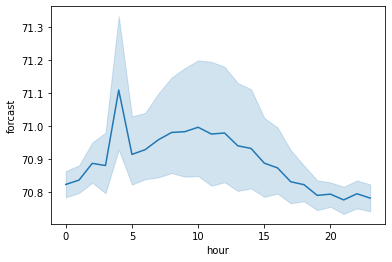

In [ ]:
sns.lineplot(x = test_df['hour'], y =  test_df['forcast'])

In [ ]:
test_df['hour'].nunique()

24

In [ ]:
train_df.drop(columns='hour', inplace=True)

In [ ]:
train_df

,demand
date,
2018-08-18 09:00:00,91.0
2018-08-18 10:00:00,21.0
2018-08-18 13:00:00,23.0
2018-08-18 14:00:00,104.0
2018-08-18 15:00:00,81.0
...,...
2021-02-28 19:00:00,95.0
2021-02-28 20:00:00,88.0
2021-02-28 21:00:00,39.0


In [ ]:
# Setup and train model and fit
model = Prophet()
model.fit(train_df.reset_index().rename(columns={'date':'ds',
                               'demand':'y'}))

In [ ]:
# Setup and train model and fit
model = Prophet()
model.fit(df.rename(columns={'date':'ds',
                               'demand':'y'}))

NameError: ignored

In [ ]:
test_df.reset_index()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5
...,...,...
7645,2022-03-28,19
7646,2022-03-28,20
7647,2022-03-28,21
7648,2022-03-28,22


In [ ]:
test_df = preprocess(test_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
test_df.head()

,hour
date,
2021-03-01 00:00:00,0
2021-03-01 01:00:00,1
2021-03-01 02:00:00,2
2021-03-01 03:00:00,3
2021-03-01 05:00:00,5


In [ ]:
test_df.drop(columns = 'hour',inplace=True)

In [ ]:
# Predict on training set with model
forcast  = model.predict(df=test_df.reset_index().rename(columns={'date':'ds'}))

In [ ]:
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-01 00:00:00,72.738629,22.611654,108.488821,72.738629,72.738629,-4.611165,-4.611165,-4.611165,-10.718313,...,1.496715,1.496715,1.496715,4.610434,4.610434,4.610434,0.0,0.0,0.0,68.127464
1,2021-03-01 01:00:00,72.738805,23.970757,108.184227,72.738805,72.738805,-7.446192,-7.446192,-7.446192,-13.164092,...,1.088366,1.088366,1.088366,4.629534,4.629534,4.629534,0.0,0.0,0.0,65.292613
2,2021-03-01 02:00:00,72.738981,19.027543,103.535889,72.738981,72.738981,-11.024880,-11.024880,-11.024880,-16.359213,...,0.685785,0.685785,0.685785,4.648549,4.648549,4.648549,0.0,0.0,0.0,61.714101
3,2021-03-01 03:00:00,72.739157,16.361436,101.135091,72.739157,72.739157,-14.113249,-14.113249,-14.113249,-19.071130,...,0.290405,0.290405,0.290405,4.667476,4.667476,4.667476,0.0,0.0,0.0,58.625908
4,2021-03-01 05:00:00,72.739509,19.574466,99.949153,72.739509,72.739509,-14.211774,-14.211774,-14.211774,-18.443448,...,-0.473393,-0.473393,-0.473393,4.705066,4.705066,4.705066,0.0,0.0,0.0,58.527735


In [ ]:
train_df

In [ ]:
forcast['yhat'].values

array([68.12746425, 65.29261348, 61.7141015 , ..., 65.51813023,
       61.71079288, 59.66954142])

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/test_6QvDdzb.csv')

In [ ]:
test_df_1 = test_df.copy()

In [ ]:
test_df_1

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5
...,...,...
7645,2022-03-28,19
7646,2022-03-28,20
7647,2022-03-28,21
7648,2022-03-28,22


In [ ]:
test_df_1['forcast'] = forcast['yhat'].values

In [ ]:
test_df_1

,date,hour,forcast
0,2021-03-01,0,68.127464
1,2021-03-01,1,65.292613
2,2021-03-01,2,61.714101
3,2021-03-01,3,58.625908
4,2021-03-01,5,58.527735
...,...,...,...
7645,2022-03-28,19,78.194753
7646,2022-03-28,20,71.427043
7647,2022-03-28,21,65.518130
7648,2022-03-28,22,61.710793


In [ ]:
test_df_1.columns = ['date','hour','demand']

In [ ]:
test_df_1.drop(columns='index', inplace=True)

KeyError: ignored

In [ ]:
test_df_1.reset_index()

ValueError: ignored

In [ ]:
test_df_1['date'] = test_df.date.values

In [ ]:
test_df_1.drop(columns='date', inplace=True)

In [ ]:
test_df_1.head()

,date,hour,demand
0,2021-03-01,0,68.127464
1,2021-03-01,1,65.292613
2,2021-03-01,2,61.714101
3,2021-03-01,3,58.625908
4,2021-03-01,5,58.527735


In [ ]:
train_df.describe()

,demand
count,18247.000000
mean,70.825780
std,35.221284
min,1.000000
25%,43.000000
50%,71.000000
75%,96.000000
max,175.000000


In [ ]:
test_df_1.describe()

,hour,demand
count,7650.000000,7650.000000
mean,12.539085,77.098991
std,6.620355,14.283580
min,0.000000,41.642127
25%,8.000000,65.531212
50%,13.000000,77.666993
75%,18.000000,88.644919
max,23.000000,111.386060


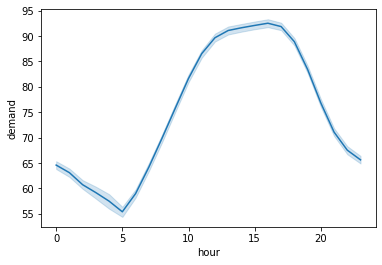

In [ ]:
sns.lineplot(x = test_df_1['hour'], y =  test_df_1['demand'])

In [ ]:
test_df_1.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [ ]:
test_df_1.to_csv('/content/drive/MyDrive/first_submission.csv',index = False)

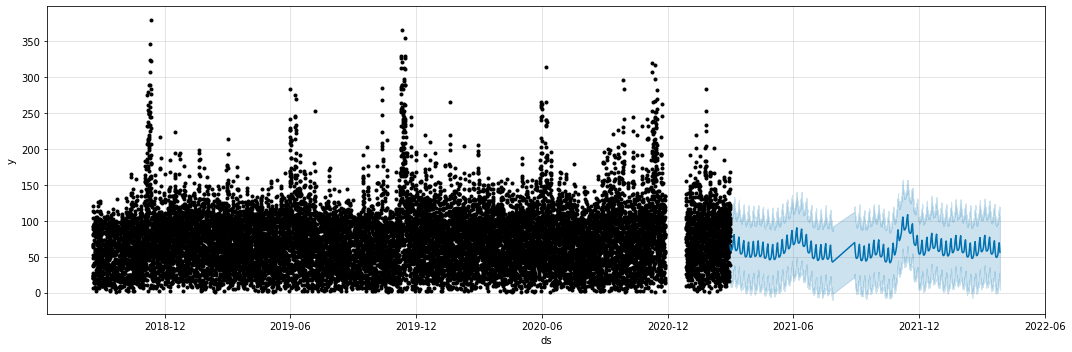

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forcast,
                 ax=ax)
plt.show()

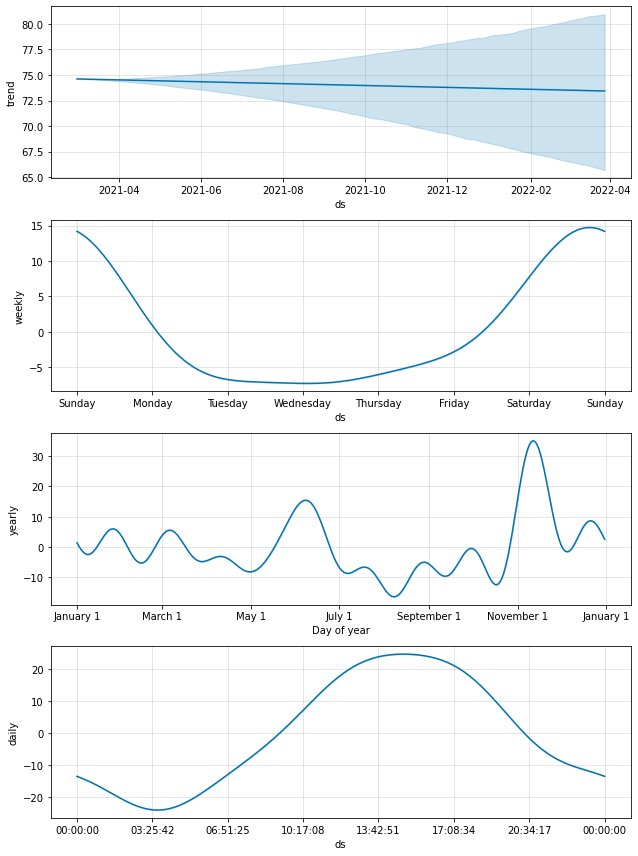

In [ ]:
fig = model.plot_components(forcast)
